# Vectorisation using Numpy

My friend Abhijit recently asked a question on what is vectorisation and this concept was a bit unclear for him. I am trying to explain it briefly using some of lessons I learned from [Andrew NG's Deep learning course](deeplearning.ai).

### But at first lets look what Rachel told in the [class](fast.ai)

Modern CPUs and GPUs can apply an operation to multiple elements at once on a single core. For instance, take the exponent of 4 floats in a vector in a single step. This is called SIMD. You will not be explicitly writing SIMD code (which tends to require assembly language or special C "intrinsics"), but instead will use vectorized operations in libraries like numpy, which in turn rely on specially tuned vectorized low level linear algebra APIs (in particular, BLAS, and LAPACK).

### Matrix computation packages like BLAS and LAPACK

[BLAS (Basic Linear Algebra Subprograms)](http://www.netlib.org/blas/): specification for low-level matrix and vector arithmetic operations. These are the standard building blocks for performing basic vector and matrix operations.  BLAS originated as a Fortran library in 1979.  Examples of BLAS libraries include: AMD Core Math Library (ACML), ATLAS, Intel Math Kernel Library (MKL), and OpenBLAS.

[LAPACK](http://www.netlib.org/lapack/) is written in Fortran, provides routines for solving systems of linear equations, eigenvalue problems, and singular value problems.  Matrix factorizations (LU, Cholesky, QR, SVD, Schur).  Dense and banded matrices are handled, but not general sparse matrices.  Real and complex, single and double precision.

1970s and 1980s: EISPACK (eigenvalue routines) and LINPACK (linear equations and linear least-squares routines) libraries

**LAPACK original goal**: make LINAPCK and EISPACK run efficiently on shared-memory vector and parallel processors and exploit cache on modern cache-based architectures (initially released in 1992).  EISPACK and LINPACK ignore multi-layered memory hierarchies and spend too much time moving data around.

LAPACK uses highly optimized block operations implementations (which much be implemented on each machine) LAPACK written so as much of the computation as possible is performed by BLAS.

(source: [Lesson1](herrl))


In [0]:
import numpy as np

In [0]:
# Naive implementation
def sumproducts(x,y):
    result = 0
    for i in range(len(x)):
        for j in range(len(y)):
            result += x[i]*j[i]
    return result

In [0]:
def sum_v(x,y):
    x = x[np.newaxis,:]
    y = y[:,np.newaxis]
    return(x*y).flatten().sum()

**What is Vectorization?**

Vectorization is a powerful ability within NumPy to express operations as occurring on entire arrays rather than their individual elements. Here’s a concise definition from Wes McKinney:

    This practice of replacing explicit loops with array expressions is commonly referred to as vectorization. In general, vectorized array operations will often be one or two (or more) orders of magnitude faster than their pure Python equivalents, with the biggest impact [seen] in any kind of numerical computations. 
    [source](https://www.oreilly.com/library/view/python-for-data/9781449323592/ch04.html)

When looping over an array or any data structure in Python, there’s a lot of overhead involved. Vectorized operations in NumPy delegate the looping internally to highly optimized C and Fortran functions, making for cleaner and faster Python code.

This code is from the [source](https://realpython.com/numpy-array-programming/)

In [11]:
np.random.seed(343)
x = np.random.choice([True, False],size=32331)
x

array([False, False,  True, ...,  True, False,  True])

In [0]:
def count_transactions(x) -> int:
  count =0
  for i,j in zip(x[:-1],x[1:]):
    if j and not i:
      count +=1
  return count

In [15]:
count_transactions(x)

8031

In [16]:
np.count_nonzero(x[:-1] < x[1:])

8031

**Buy Low, Sell High**

Naive way


In [0]:
 def profit(prices):
...     max_px = 0
...     min_px = prices[0]
...     for px in prices[1:]:
...         min_px = min(min_px, px)
...         max_px = max(px - min_px, max_px)
...     return max_px


In [20]:
prices = [3,25,20,34,11,52,1]
profit(prices)

49

In [23]:
##Numpy way

prices = np.full(100,fill_value=np.nan)
prices[[0,25,60,-1]] = [80,30,24,50.]
prices


array([80., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 30.,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, 24., nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, 50.])

In [25]:
# Linearly interpolate the missing values and add some noise.
>>> x = np.arange(len(prices))
>>> is_valid = ~np.isnan(prices)
>>> prices = np.interp(x=x, xp=x[is_valid], fp=prices[is_valid])
>>> prices += np.random.randn(len(prices)) * 2
prices

array([82.7461237 , 77.59882341, 76.34587185, 72.22852067, 77.26778566,
       73.2592392 , 71.81655333, 63.40670567, 68.07829746, 61.85925994,
       59.77077327, 56.09484542, 51.60708599, 56.85643813, 54.88233337,
       49.34457635, 48.19090109, 46.16015471, 43.19317281, 40.46661339,
       38.00757836, 35.47757097, 37.15611734, 30.63715036, 36.26539673,
       30.63089107, 28.8780421 , 24.32023244, 28.30707095, 28.19509188,
       28.00987048, 27.86474066, 30.95111954, 26.28911995, 28.82800924,
       27.50514083, 29.69357535, 22.18630921, 27.48147152, 30.08157581,
       24.60783548, 27.6273575 , 29.52592252, 26.64175613, 26.17134039,
       27.69447943, 26.20251811, 31.40742236, 22.46820779, 27.93547135,
       21.5368078 , 26.45907927, 24.7545115 , 24.42924432, 25.38462033,
       25.0143149 , 29.59142871, 20.11941655, 25.71026774, 22.02588703,
       23.78035484, 21.6635428 , 23.81055641, 25.82299807, 27.6083312 ,
       24.72397155, 33.77843846, 29.49014174, 29.85290176, 23.08

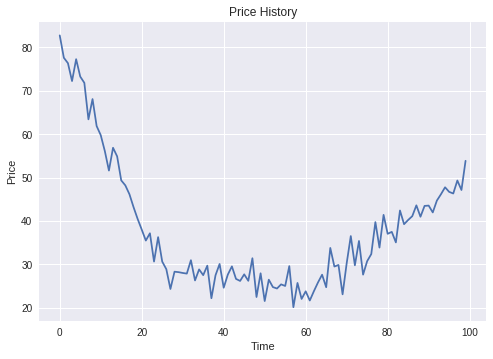

In [26]:
>>> import matplotlib.pyplot as plt

# Warning! This isn't a fully correct solution, but it works for now.
# If the absolute min came after the absolute max, you'd have trouble.
>>> mn = np.argmin(prices)
>>> mx = mn + np.argmax(prices[mn:])
>>> kwargs = {'markersize': 12, 'linestyle': ''}

>>> fig, ax = plt.subplots()
>>> ax.plot(prices)
>>> ax.set_title('Price History')
>>> ax.set_xlabel('Time')
>>> ax.set_ylabel('Price')
>>> ax.plot(mn, prices[mn], color='green', **kwargs)
>>> ax.plot(mx, prices[mx], color='red', **kwargs)

In [0]:
cummin = np.minimum.accumulate


In [0]:
def profit_with_numpy(prices):
...     """Price minus cumulative minimum price, element-wise."""
...     prices = np.asarray(prices)
...     return np.max(prices - cummin(prices))

In [33]:
profit_with_numpy(prices)

33.7286651487919

In [34]:
#Intermezzo: Understanding Axes Notation
arr= np.array([[1,2,5],
              [11,5,23]])
arr.sum(axis=0)

array([12,  7, 28])

In [35]:
arr.sum(axis=1)

array([ 8, 39])

In [36]:
# Brodcasting
>>> a = np.array([1.5, 2.5, 3.5])
>>> b = np.array([10., 5., 1.])
>>> a / b

array([0.15, 0.5 , 3.5 ])